In [84]:
import random
import operator

import numpy as np
import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [85]:
pset = gp.PrimitiveSetTyped("main", [float, float, float, float, 
                                     bool, bool, bool, bool, bool, bool, bool, bool], bool)
pset.addPrimitive(operator.xor, [bool, bool], bool)
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.mul, [float, float], float)
pset.addPrimitive(operator.add, [float, float], float)
pset.addPrimitive(operator.pow, [float, float], float)
pset.addPrimitive(np.subtract, [float, float], float)

In [86]:
expr = gp.genFull(pset, min_=12, max_=12)
tree = gp.PrimitiveTree(expr)

In [87]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin,
               pset=pset)

In [183]:
# Age  SibSp  Parch      Fare  female  male  C  Q  S  1  2  3
def evalSymbReg(tree, pset):
    function = gp.compile(tree, pset)
    i = 0
    total_correct = 0
    fp = 0
    fn = 0
    for row in df1.iterrows():
        Age = df1.iloc[i,0]
        SibSp = df1.iloc[i, 1]
        Parch = df1.iloc[i, 2]
        Fare = df1.iloc[i, 3]
        female = df1.iloc[i, 4]
        male = df1.iloc[i, 5]
        c = df1.iloc[i, 6]
        q = df1.iloc[i, 7]
        s = df1.iloc[i, 8]
        p1 = df1.iloc[i, 9]
        p2 = df1.iloc[i, 10]
        p3 = df1.iloc[i, 11]
        x = int(function(Age, SibSp, Parch, Fare, female, male, c,q,s,p1,p2,p3))
        truth = y1.iloc[i]
        if x != truth:
            if x == 0:
                fn += 1
            else:
                fp += 1
        i += 1
    return fp, fn

In [184]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=12)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalSymbReg, pset = pset)
toolbox.register("select", tools.selNSGA2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [185]:
df = pd.read_csv('train.csv', delimiter=',')

In [186]:
sex = pd.Series(df['Sex'])
sexDF = pd.get_dummies(sex)
df = df.drop('Sex', axis = 1)
df = df.join(sexDF)

In [187]:
embarked = pd.Series(df['Embarked'])
embarkedDF = pd.get_dummies(embarked)
df = df.drop('Embarked', axis = 1)
df = df.join(embarkedDF)

In [188]:
#df['Pclass'].fillna((df['Pclass'].mean()), inplace=True)
pclass = pd.Series(df['Pclass'])
pclassDF = pd.get_dummies(pclass)
df = df.drop('Pclass', axis = 1)
df = df.join(pclassDF)

In [189]:
df = df.drop({'Name', 'Ticket', 'Cabin'}, axis = 1)

df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df['SibSp'].fillna((df['SibSp'].mean()), inplace=True)
df['Fare'].fillna( int(df['Fare'].mean()), inplace=True)
df['Parch'].fillna((df['Parch'].mean()), inplace=True)

df1 = df.drop("Survived", axis = 1)
y1 = df['Survived']

df1 = df1.drop('PassengerId', axis = 1)
#We don't need to cross-validate but we are simply testing the individual with the entire training data and basing fitness
#off of that
#df1, df2, y1, y2 = train_test_split(df1, y1, test_size=.3, random_state = 0)

In [190]:
pop = toolbox.population(n=300)
fitnesses = list(map(toolbox.evaluate, pop))


In [191]:
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit
    print(ind.fitness.values)

(539.0, 75.0)
(129.0, 212.0)
(363.0, 244.0)
(477.0, 169.0)
(402.0, 220.0)
(547.0, 46.0)
(68.0, 266.0)
(524.0, 19.0)
(549.0, 0.0)
(109.0, 190.0)
(78.0, 295.0)
(414.0, 48.0)
(41.0, 326.0)
(549.0, 2.0)
(549.0, 0.0)
(276.0, 167.0)
(45.0, 315.0)
(0.0, 342.0)
(409.0, 103.0)
(127.0, 188.0)
(439.0, 129.0)
(224.0, 253.0)
(418.0, 78.0)
(455.0, 86.0)
(202.0, 200.0)
(541.0, 2.0)
(482.0, 54.0)
(73.0, 243.0)
(0.0, 342.0)
(309.0, 134.0)
(99.0, 208.0)
(329.0, 183.0)
(411.0, 198.0)
(549.0, 0.0)
(445.0, 141.0)
(84.0, 294.0)
(391.0, 224.0)
(53.0, 133.0)
(2.0, 296.0)
(274.0, 80.0)
(0.0, 342.0)
(54.0, 266.0)
(348.0, 190.0)
(379.0, 219.0)
(206.0, 110.0)
(543.0, 61.0)
(130.0, 225.0)
(312.0, 216.0)
(292.0, 234.0)
(72.0, 270.0)
(430.0, 118.0)
(0.0, 340.0)
(4.0, 254.0)
(25.0, 325.0)
(0.0, 342.0)
(248.0, 222.0)
(549.0, 0.0)
(516.0, 10.0)
(384.0, 91.0)
(508.0, 34.0)
(462.0, 115.0)
(2.0, 296.0)
(464.0, 40.0)
(112.0, 180.0)
(9.0, 326.0)
(6.0, 281.0)
(396.0, 84.0)
(159.0, 212.0)
(489.0, 74.0)
(549.0, 0.0)
(257.0, 15

In [192]:
#toolbox.evaluate(pop)
#for g in range(ngen = 40):
#    pop = tools.seltournament(pop, len(population), 3, evalSymbReg)
#    offspring = varAnd(pop, toolbox, 0.5, 0.1)
#    toolbox.evaluate(offspring)
#    pop = offspring

In [211]:
hof = tools.ParetoFront()

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

#pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 10, stats=mstats,
#                               halloffame=hof, verbose=True)

pop, log = algorithms.eaMuCommaLambda(pop, toolbox, 300, 600, 0.5, 0.1, 10, stats=mstats,
                               halloffame=hof, verbose=True)

   	      	            fitness            	              size             
   	      	-------------------------------	-------------------------------
gen	nevals	avg    	max	min	std    	avg    	max 	min	std    
0  	0     	145.037	547	0  	109.874	6585.95	8381	11 	3116.12
1  	366   	144.777	547	0  	109.298	6387.41	8417	11 	3255.28
2  	363   	142.775	547	0  	107.553	5755.15	8387	11 	3569.63
3  	353   	140.783	547	0  	105.039	5761.67	8387	23 	3555.57
4  	367   	138.452	547	0  	106.331	4530.83	8387	25 	3858.06
5  	355   	124.858	547	0  	85.7718	2364.04	8539	25 	3382.5 
6  	364   	119.142	547	0  	84.731 	693.52 	8355	25 	1434.12
7  	361   	111.162	547	0  	76.8315	779.54 	8357	25 	1487.43
8  	346   	103.765	547	0  	78.0803	803.433	8371	25 	1284.75
9  	356   	101.21 	547	0  	70.5608	835.693	8373	25 	1343.2 
10 	360   	101.17 	547	0  	73.3087	800.093	8359	25 	1350.6 


In [212]:
xList = list()
yList = list()
for ind in hof:
    xList.append(ind.fitness.values[0])
    yList.append(ind.fitness.values[1])
    print(ind.fitness.values)

(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(7.0, 229.0)
(8.0, 226.0)
(15.0, 214.0)
(15.0, 214.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(19.0, 164.0)
(19.0, 164.0)
(19.0, 164.0)
(

(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0, 52.0)
(198.0

In [81]:
#toolbox.register('compile', gp.compile, pset=pset)
#indList = list()
#i = 0
#for ind in pop:
#    print(i)
#    func = toolbox.compile(ind)
#    predict = list()
#    for index, row in df1.iterrows():
#        Age = df1.iloc[i,0]
#        SibSp = df1.iloc[i, 1]
#        Parch = df1.iloc[i, 2]
#        Fare = df1.iloc[i, 3]
#        female = df1.iloc[i, 4]
#        male = df1.iloc[i, 5]
#        c = df1.iloc[i, 6]
#        q = df1.iloc[i, 7]
#        s = df1.iloc[i, 8]
#        p1 = df1.iloc[i, 9]
#        p2 = df1.iloc[i, 10]
#        p3 = df1.iloc[i, 11]
#        predict.append(int(func(Age, SibSp, Parch, Fare, female, male, c,q,s,p1,p2,p3)))
#    predict
#    indList.append(predict)
#    i += 1
#indList

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [82]:
#answerList = y1.tolist()
#individuals = list()
#xList = list()
#yList = list()
#for ind in indList:
#    fp = 0
#    fn = 0
#    for i in range(len(answerList)):
#        if ind[i] != answerList[i]:
#            if ind[i] == 0:
#                fn += 1
#            else:
#                fp += 1
#    individuals.append((fp,fn))
#    xList.append(fp)
#    yList.append(fn)
#individuals

[(0, 342),
 (549, 0),
 (0, 342),
 (549, 0),
 (0, 342),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (549, 0),
 (0, 342),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (549, 0),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (549, 0),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),
 (0, 342),

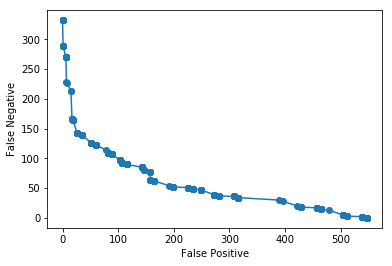

In [213]:
import matplotlib.pyplot as plt

def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.scatter(Xs,Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.plot(pf_X, pf_Y)
    plt.xlabel("False Positive")
    plt.ylabel("False Negative")
    plt.show()
    
plot_pareto_frontier(xList, yList)

In [214]:
print(len(hof))
hof.update(pop)
for ind in hof:
    print(ind.fitness.values)
tools.ParetoFront()

3109
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(0.0, 332.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(1.0, 288.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(6.0, 270.0)
(7.0, 229.0)
(8.0, 226.0)
(15.0, 214.0)
(15.0, 214.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(17.0, 166.0)
(19.0, 164.0)
(19.0, 164.0)
(19.0, 164

(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0, 49.0)
(234.0

In [221]:
finList = list()
valList = list()
i = 0
for ind in hof:
    print(i)
    if len(finList) == 0:
        finList.append(ind)
        valList.append(ind.fitness.values)
    else:
        if ind.fitness.values not in valList:
            finList.append(ind)
            valList.append(ind.fitness.values)
    i += 1   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [222]:
for ind in finList:
    print(ind.fitness.values)

(0.0, 332.0)
(1.0, 288.0)
(6.0, 270.0)
(7.0, 229.0)
(8.0, 226.0)
(15.0, 214.0)
(17.0, 166.0)
(19.0, 164.0)
(26.0, 142.0)
(35.0, 140.0)
(52.0, 125.0)
(60.0, 123.0)
(78.0, 114.0)
(81.0, 109.0)
(89.0, 107.0)
(103.0, 97.0)
(106.0, 92.0)
(115.0, 90.0)
(143.0, 85.0)
(147.0, 80.0)
(157.0, 77.0)
(158.0, 64.0)
(165.0, 62.0)
(192.0, 54.0)
(198.0, 52.0)
(226.0, 51.0)
(234.0, 49.0)
(248.0, 47.0)
(273.0, 39.0)
(281.0, 37.0)
(308.0, 36.0)
(316.0, 34.0)
(389.0, 30.0)
(396.0, 28.0)
(422.0, 20.0)
(429.0, 18.0)
(458.0, 17.0)
(465.0, 15.0)
(478.0, 13.0)
(504.0, 5.0)
(511.0, 3.0)
(539.0, 2.0)
(547.0, 0.0)


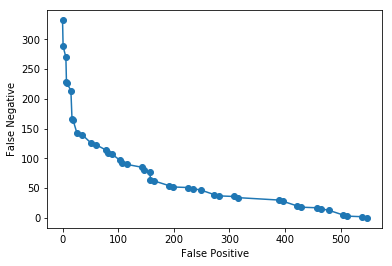

In [223]:
xList = list()
yList = list()
for ind in finList:
    xList.append(ind.fitness.values[0])
    yList.append(ind.fitness.values[1])
plot_pareto_frontier(xList, yList)

In [224]:
print(len(finList))

43


In [226]:
avgList = list()
for ind in finList:
    avg = (ind.fitness.values[0] + ind.fitness.values[1]) / 2
    avgList.append(avg)
avgList

[166.0,
 144.5,
 138.0,
 118.0,
 117.0,
 114.5,
 91.5,
 91.5,
 84.0,
 87.5,
 88.5,
 91.5,
 96.0,
 95.0,
 98.0,
 100.0,
 99.0,
 102.5,
 114.0,
 113.5,
 117.0,
 111.0,
 113.5,
 123.0,
 125.0,
 138.5,
 141.5,
 147.5,
 156.0,
 159.0,
 172.0,
 175.0,
 209.5,
 212.0,
 221.0,
 223.5,
 237.5,
 240.0,
 245.5,
 254.5,
 257.0,
 270.5,
 273.5]

In [227]:
np.mean(avgList)    

150.55813953488371

In [228]:
finalList = list()
for ind, avg in zip(finList, avgList):
    if avg <= 150:
        finalList.append(ind)

In [232]:
for ind in finalList:
    print(ind.fitness.values)
len(finalList)

(1.0, 288.0)
(6.0, 270.0)
(7.0, 229.0)
(8.0, 226.0)
(15.0, 214.0)
(17.0, 166.0)
(19.0, 164.0)
(26.0, 142.0)
(35.0, 140.0)
(52.0, 125.0)
(60.0, 123.0)
(78.0, 114.0)
(81.0, 109.0)
(89.0, 107.0)
(103.0, 97.0)
(106.0, 92.0)
(115.0, 90.0)
(143.0, 85.0)
(147.0, 80.0)
(157.0, 77.0)
(158.0, 64.0)
(165.0, 62.0)
(192.0, 54.0)
(198.0, 52.0)
(226.0, 51.0)
(234.0, 49.0)
(248.0, 47.0)


27

In [234]:
avgList = list()
for ind in finalList:
    avg = (ind.fitness.values[0] + ind.fitness.values[1]) / 2
    avgList.append(avg)
avgList
np.mean(avgList)

111.16666666666667

In [235]:
finalList = list()
for ind, avg in zip(finList, avgList):
    if avg <= 111:
        finalList.append(ind)

In [236]:
for ind in finalList:
    print(ind.fitness.values)
len(finalList)

(15.0, 214.0)
(17.0, 166.0)
(19.0, 164.0)
(26.0, 142.0)
(35.0, 140.0)
(52.0, 125.0)
(60.0, 123.0)
(78.0, 114.0)
(81.0, 109.0)
(89.0, 107.0)
(103.0, 97.0)
(106.0, 92.0)
(157.0, 77.0)


13

In [ ]:
df = pd.read_csv('test.csv', delimiter=',')

sex = pd.Series(df['Sex'])
sexDF = pd.get_dummies(sex)
df = df.drop('Sex', axis = 1)
df = df.join(sexDF)

embarked = pd.Series(df['Embarked'])
embarkedDF = pd.get_dummies(embarked)
df = df.drop('Embarked', axis = 1)
df = df.join(embarkedDF)

#df['Pclass'].fillna((df['Pclass'].mean()), inplace=True)
pclass = pd.Series(df['Pclass'])
pclassDF = pd.get_dummies(pclass)
df = df.drop('Pclass', axis = 1)
df = df.join(pclassDF)

df = df.drop({'Name', 'Ticket', 'Cabin'}, axis = 1)

df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df['SibSp'].fillna((df['SibSp'].mean()), inplace=True)
df['Fare'].fillna( int(df['Fare'].mean()), inplace=True)
df['Parch'].fillna((df['Parch'].mean()), inplace=True)
pID = df1['PassengerId']
df1 = df1.drop('PassengerId', axis = 1)
#We don't need to cross-validate but we are simply testing the individual with the entire training data and basing fitness
#off of that
#df1, df2, y1, y2 = train_test_split(df1, y1, test_size=.3, random_state = 0)



In [238]:
ansList = list()
for ind in finalList:
    i = 0
    predictList = list()
    function = gp.compile(ind, pset)
    for row in df1.iterrows():
        Age = df1.iloc[i,0]
        SibSp = df1.iloc[i, 1]
        Parch = df1.iloc[i, 2]
        Fare = df1.iloc[i, 3]
        female = df1.iloc[i, 4]
        male = df1.iloc[i, 5]
        c = df1.iloc[i, 6]
        q = df1.iloc[i, 7]
        s = df1.iloc[i, 8]
        p1 = df1.iloc[i, 9]
        p2 = df1.iloc[i, 10]
        p3 = df1.iloc[i, 11]
        x = int(function(Age, SibSp, Parch, Fare, female, male, c,q,s,p1,p2,p3))
        predictList.append(x)
        i += 1
    ansList.append(predictList)

In [239]:
ansList

[[0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,


In [264]:
csv_input = pd.read_csv('test.csv', delimiter=',')
csv_input = csv_input['PassengerId']
csv_input = pd.DataFrame(csv_input)
i = 0
for ind in ansList:
    n = pd.DataFrame(ind)
    n.columns.values[0] = i
    i += 1
    print(n)
    csv_input = csv_input.join(n)
    

     0
0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
10   0
11   0
12   0
13   0
14   0
15   1
16   0
17   0
18   0
19   1
20   0
21   0
22   0
23   0
24   0
25   0
26   0
27   0
28   0
29   0
..  ..
861  0
862  0
863  0
864  0
865  1
866  1
867  0
868  0
869  0
870  0
871  0
872  0
873  0
874  1
875  1
876  0
877  0
878  0
879  1
880  1
881  0
882  0
883  0
884  0
885  0
886  0
887  0
888  0
889  0
890  0

[891 rows x 1 columns]
     1
0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    1
10   0
11   1
12   0
13   0
14   0
15   1
16   0
17   0
18   0
19   1
20   0
21   0
22   0
23   0
24   0
25   0
26   0
27   0
28   0
29   0
..  ..
861  0
862  1
863  0
864  0
865  1
866  1
867  0
868  0
869  0
870  0
871  1
872  0
873  0
874  1
875  1
876  0
877  0
878  0
879  1
880  1
881  0
882  0
883  0
884  0
885  0
886  0
887  1
888  0
889  0
890  0

[891 rows x 1 columns]
     2
0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
10   0


In [266]:
csv_input
csv_input.to_csv('submitP2.csv', index = False)